# Importing Libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.6.0


# Download Fashion MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [4]:
train_images.shape

(60000, 28, 28)

# Visualize Image

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

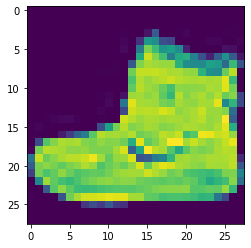

In [5]:
np.set_printoptions(linewidth=200)
print(train_labels[0])
print(train_images[0])

plt.imshow(train_images[0])

# Normalize Data & Reshape the Data

In [6]:
train_images[0].shape

(28, 28)

In [7]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [8]:
train_images.shape

(60000, 28, 28, 1)

In [9]:
test_images.shape

(10000, 28, 28, 1)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Design and Train the Model

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [27]:
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4397 - accuracy: 0.8407
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2974 - accuracy: 0.8921
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2507 - accuracy: 0.9072
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2203 - accuracy: 0.9171
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1926 - accuracy: 0.9269


In [14]:
model_evaluation = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.2517 - accuracy: 0.9056


In [15]:
model_evaluation

[0.25169721245765686, 0.9056000113487244]

# Visulaize Convolution and Pooling

In [16]:
print(test_labels[:100])
print(test_labels[0])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]
9


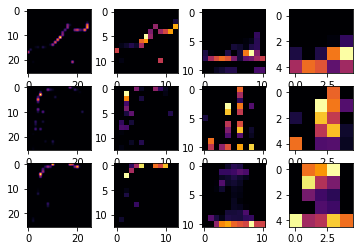

In [28]:
f, axarr = plt.subplots(nrows=3, ncols=4)

FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input,
                                         outputs=layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0, x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1, x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2, x].grid(False)

# Exercise 01

* Change number of Convolution: 16 or 64

In [18]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4054 - accuracy: 0.8571
Epoch 2/5
187

[0.2635432481765747, 0.9060999751091003]

# Exercise 02

* Remove final Convolution

In [19]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3790 - accuracy: 0.8647
Epoch 2/

[0.2519894540309906, 0.916700005531311]

# Exercise 03

* Adding more convolution

In [20]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

[0.3711835741996765, 0.8658000230789185]

# Exercise 04

* Remove all convolution except first

In [22]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5)

model.evaluate(test_images, test_labels)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3719 - accuracy: 0.8664
Epoch 2/

[0.25477665662765503, 0.9161999821662903]

# Exercise 05

* Implement Callback

In [23]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

# Create callback class
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') < 0.4:
      print('\n Cancelling Training...')
      self.model.stop_training = True

callbacks = myCallbacks()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=(3,3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=5,
                    callbacks=[callbacks])

model.evaluate(test_images, test_labels)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

[0.31776976585388184, 0.8848000168800354]